In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
f = 'reflectance/resources/spectral_library_clean_v3_PRISM_wavebands.csv'
df = pd.read_csv(f, skiprows=1).set_index('wavelength')
df.columns = df.columns.astype(float)
df = df.astype(float)

In [81]:
from sklearn.decomposition import PCA, NMF, TruncatedSVD

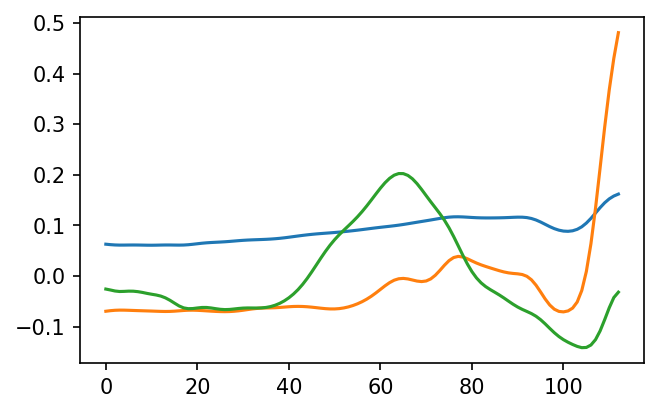

In [92]:
pca = PCA(3)
pca.fit_transform(df)

plt.plot(pca.components_.T)

In [86]:
def Rb_pca(p0, p1, p2):
    return p0 * pca.components_[0] + p1 * pca.components_[1] + p2 * pca.components_[2]

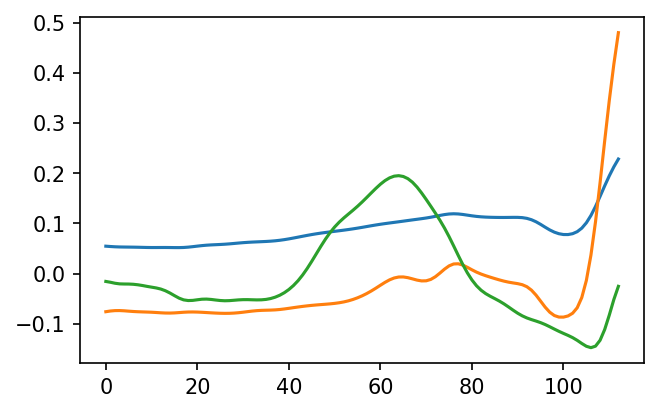

In [93]:
svd = TruncatedSVD(3)
svd.fit_transform(df)

plt.plot(svd.components_.T)

In [84]:
svd.explained_variance_ratio_.cumsum()

array([0.8979756 , 0.97263838, 0.98511882])

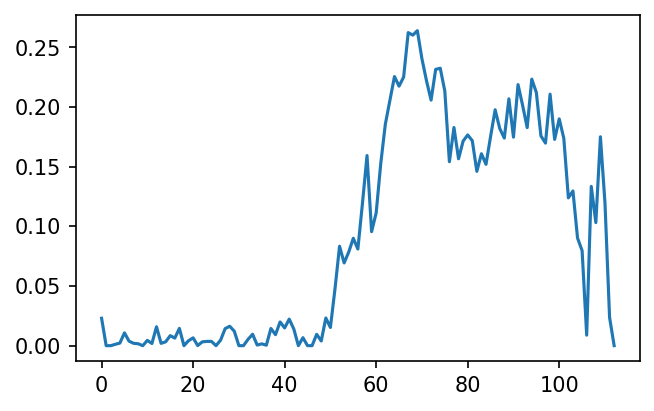

In [79]:
plt.plot(nmf.components_[7])

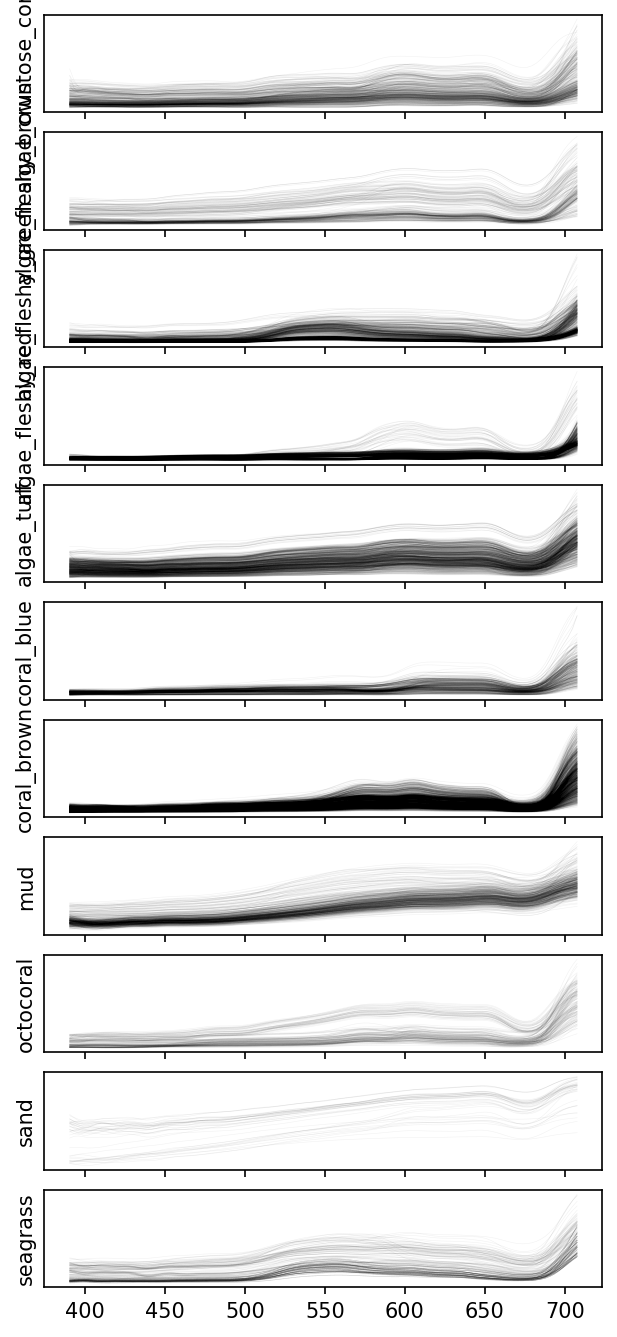

In [22]:
cats = df.index.unique()

fig, axs = plt.subplots(len(cats), 1, figsize=[4, len(cats) * 0.8], sharex=True, constrained_layout=True)

for c, ax in zip(cats, axs):
    ind = df.index == c
    ax.plot(df.columns, df.loc[ind].values.T, color='k', alpha=0.05, lw=0.3)
    
    ax.plot(df.columns, df.loc[ind].values.T, color='k', alpha=0.05, lw=0.3)
    
    ax.set_ylabel(c)
    ax.set_yticks([])